<a href="https://colab.research.google.com/github/sury1999/Data-Analysis-Projects/blob/main/Grip_Task2_Optimal_Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**THE SPARKS FOUNDATION**
##**BUSINESS ANALYTICS INTERNSHIP**
##**GRIP TASK2**
###From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [48]:
df = pd.read_csv('/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [49]:
X = df.iloc[:,1:5].values


##ELBOW METHOD

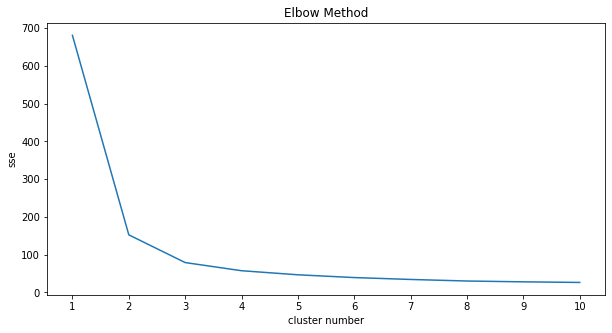

In [50]:
sse = []
for i in range(1,11):
  kmean = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300)
  kmean.fit(X)
  sse.append(kmean.inertia_)
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(range(1,11), sse)
plt.xticks(range(1,11))
ax.set(xlabel='cluster number', ylabel='sse', title='Elbow Method')
plt.show()

##**From this graph we will take clusters as 3**

##Using Silhouette Coefficient Method(Unreliable as different results everytime

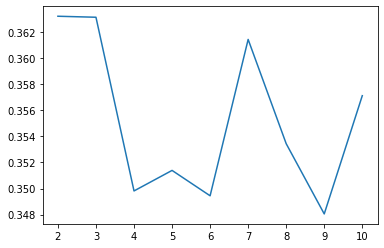

In [51]:
silhouette_coef = []
for i in range(2, 11):
  kmean = KMeans(init='k-means++', n_init=10, max_iter=300)
  kmean.fit(X)
  score = silhouette_score(X, kmean.labels_)
  silhouette_coef.append(score)
plt.plot(range(2,11), silhouette_coef)

In [77]:
kmean = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=0)
Y = kmean.fit_predict(X)

(150, 4)

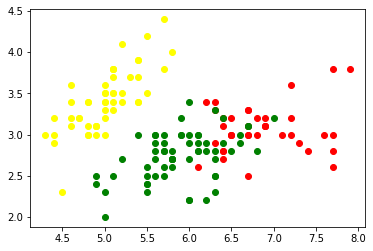

In [89]:
#Sepal Plots
plt.scatter(X[Y==0, 0], X[Y==0, 1], color='red')
plt.scatter(X[Y==1, 0], X[Y==1, 1], color='yellow')
plt.scatter(X[Y==2, 0], X[Y==2, 1], color='green')